# Introduction

---

Notebook ini ditujukan untuk seleksi Asisten Lab GaIB, berisikan code end-to-end machine learning untuk mengklasifikasi penyakit jantung berdasarkan data pasien.

Link spesifikasi: bit.ly/seleksiGaIB2024


Author: <br>
Novelya Putri Ramadhani 13522096 <br>

# Table Of Contents

**I. Introduction** <br>
**II. Import Libraries** <br>
**III. Dataset Description** <br>
**IV. Exploratory Data Analysis** <br>
- Load and Preview the Dataset
- Dataset Overview
- Descriptive Statistics
- Data Distribution
- Correlation Analysis
- Outlier Detection

**V. Data Preprocessing** <br>
- Data Cleaning
    - Remove Duplicates
    - Handling Outliers
- Data Transformation
    - Standardization
    - Categorical Data Encoding

**VI. Modeling and Validation** <br>
- Data Splitting and Cross-Validation Setup
- Model 1: K-Nearest Neighbors (KNN)
- Model 2: Logistic Regression
- Model 3: Gaussian Naive Bayes
- Model 4: CART (Classification and Regression Tree)
- Model 5: SVM (Support Vector Machine)
- Model 6: ANN (Artificial Neural Network)

# Import Libraries

In [113]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import libraries for machine learning models
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import importlib

# Other utility libraries
import warnings
warnings.filterwarnings('ignore')

# Dataset Description

Dataset yang digunakan dalam proyek ini diambil dari [Kaggle](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset) dan berisi informasi medis dari pasien yang digunakan untuk memprediksi risiko penyakit jantung. Dataset ini mencakup berbagai fitur yang relevan, seperti usia, tekanan darah, dan hasil tes elektrokardiografi, yang dapat digunakan untuk membangun model prediksi penyakit jantung.

## Detailed Description of Features

- age: Usia pasien dalam tahun.
- sex: Jenis kelamin pasien (1 = laki-laki, 0 = perempuan).
- cp (chest pain type): Tipe nyeri dada, yang dibagi menjadi 4 kategori:
    - 0: Typical angina
    - 1: Atypical angina
    - 2: Non-anginal pain
    - 3: Asymptomatic
- trestbps (resting blood pressure): Tekanan darah istirahat dalam mm Hg.
- chol (serum cholestoral): Kadar kolesterol dalam mg/dl.
- fbs (fasting blood sugar): Gula darah puasa > 120 mg/dl (1 = benar, 0 = salah).
- restecg (resting electrocardiographic results): Hasil elektrokardiografi istirahat:
    - 0: Normal
    - 1: Memiliki kelainan gelombang ST-T (gelombang T inversi dan/atau elevasi atau depresi ST > 0,05 mV)
    - 2: Menunjukkan hipertrofi ventrikel kiri
- thalach (maximum heart rate achieved): Denyut jantung maksimum yang dicapai.
- exang (exercise induced angina): Angina yang disebabkan oleh olahraga (1 = ya, 0 = tidak).
- oldpeak: Depresi segmen ST yang diinduksi oleh latihan relatif terhadap istirahat.
- slope (the slope of the peak exercise ST segment): Kemiringan segmen ST pada puncak latihan:
    - 0: Upsloping
    - 1: Flat
    - 2: Downsloping
- ca (number of major vessels): Jumlah pembuluh darah utama (0-3) yang diwarnai oleh flouroskopi.
- thal: Status thalassemia:
    - 0: Normal
    - 1: Cacat tetap
    - 2: Cacat reversibel
- target: Fitur target yang menunjukkan apakah pasien memiliki penyakit jantung (1 = ya, 0 = tidak).

# Exploratory Data Analysis

## Load and Preview the Dataset

In [114]:
data = pd.read_csv('../../dataset/heart.csv')

In [115]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Dataset Overview

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [117]:
# Check for missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Tidak ada missing value pada dataset ini sehingga tidak perlu dilakukan handling missing value.

In [118]:
# Check for duplicate values
data.duplicated().sum()

np.int64(723)

Terdapat duplikat data pada dataset ini, sehingga perlu dilakukan handling duplikat data.

## Descriptive Statistics

In [119]:
num = data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']]
cat = data[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']]

In [120]:
# Summary statistics for numerical features
num.describe()

,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


In [121]:
# Summary statistics for categorical features

# unique values count
cat.nunique()


sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
ca         5
thal       4
target     2
dtype: int64

In [122]:
# value counts for each categorical feature
for i in cat.columns:
    print(cat[i].value_counts())

sex
1    713
0    312
Name: count, dtype: int64
cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64
fbs
0    872
1    153
Name: count, dtype: int64
restecg
1    513
0    497
2     15
Name: count, dtype: int64
exang
0    680
1    345
Name: count, dtype: int64
slope
1    482
2    469
0     74
Name: count, dtype: int64
ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64
thal
2    544
3    410
1     64
0      7
Name: count, dtype: int64
target
1    526
0    499
Name: count, dtype: int64


## Data Distribution

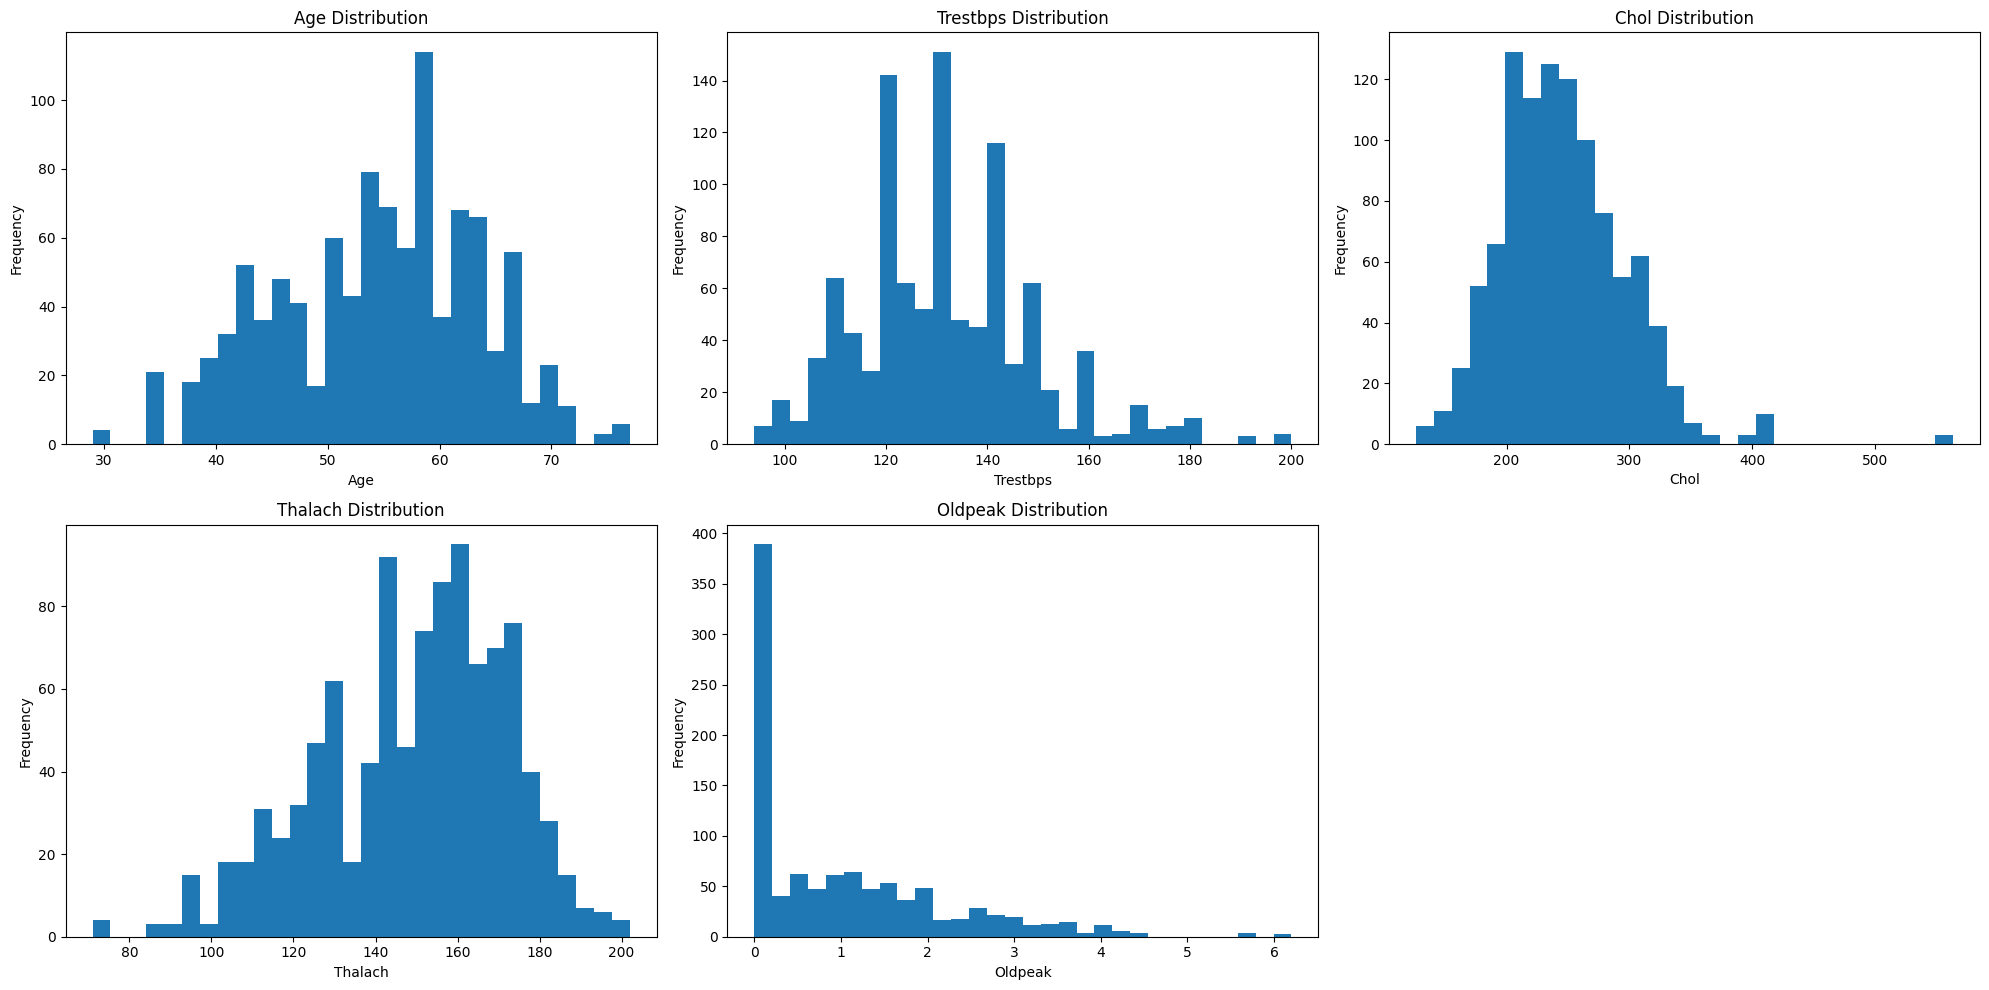

In [123]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Histogram for all numerical features
for i, column in enumerate(num.columns):
    if i < axes.size:
        row = i // 3
        col = i % 3
        axes[row, col].hist(num[column], bins=30)
        axes[row, col].set_title(f'{column.capitalize()} Distribution')
        axes[row, col].set_xlabel(column.capitalize())
        axes[row, col].set_ylabel('Frequency')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Sebagian besar fitur numerik, seperti usia (age) dan tekanan darah istirahat (trestbps), menunjukkan distribusi yang relatif normal dengan beberapa outlier.
Fitur oldpeak menunjukkan distribusi yang sangat skewed, yang mungkin memerlukan transformasi logaritmik atau penanganan khusus.

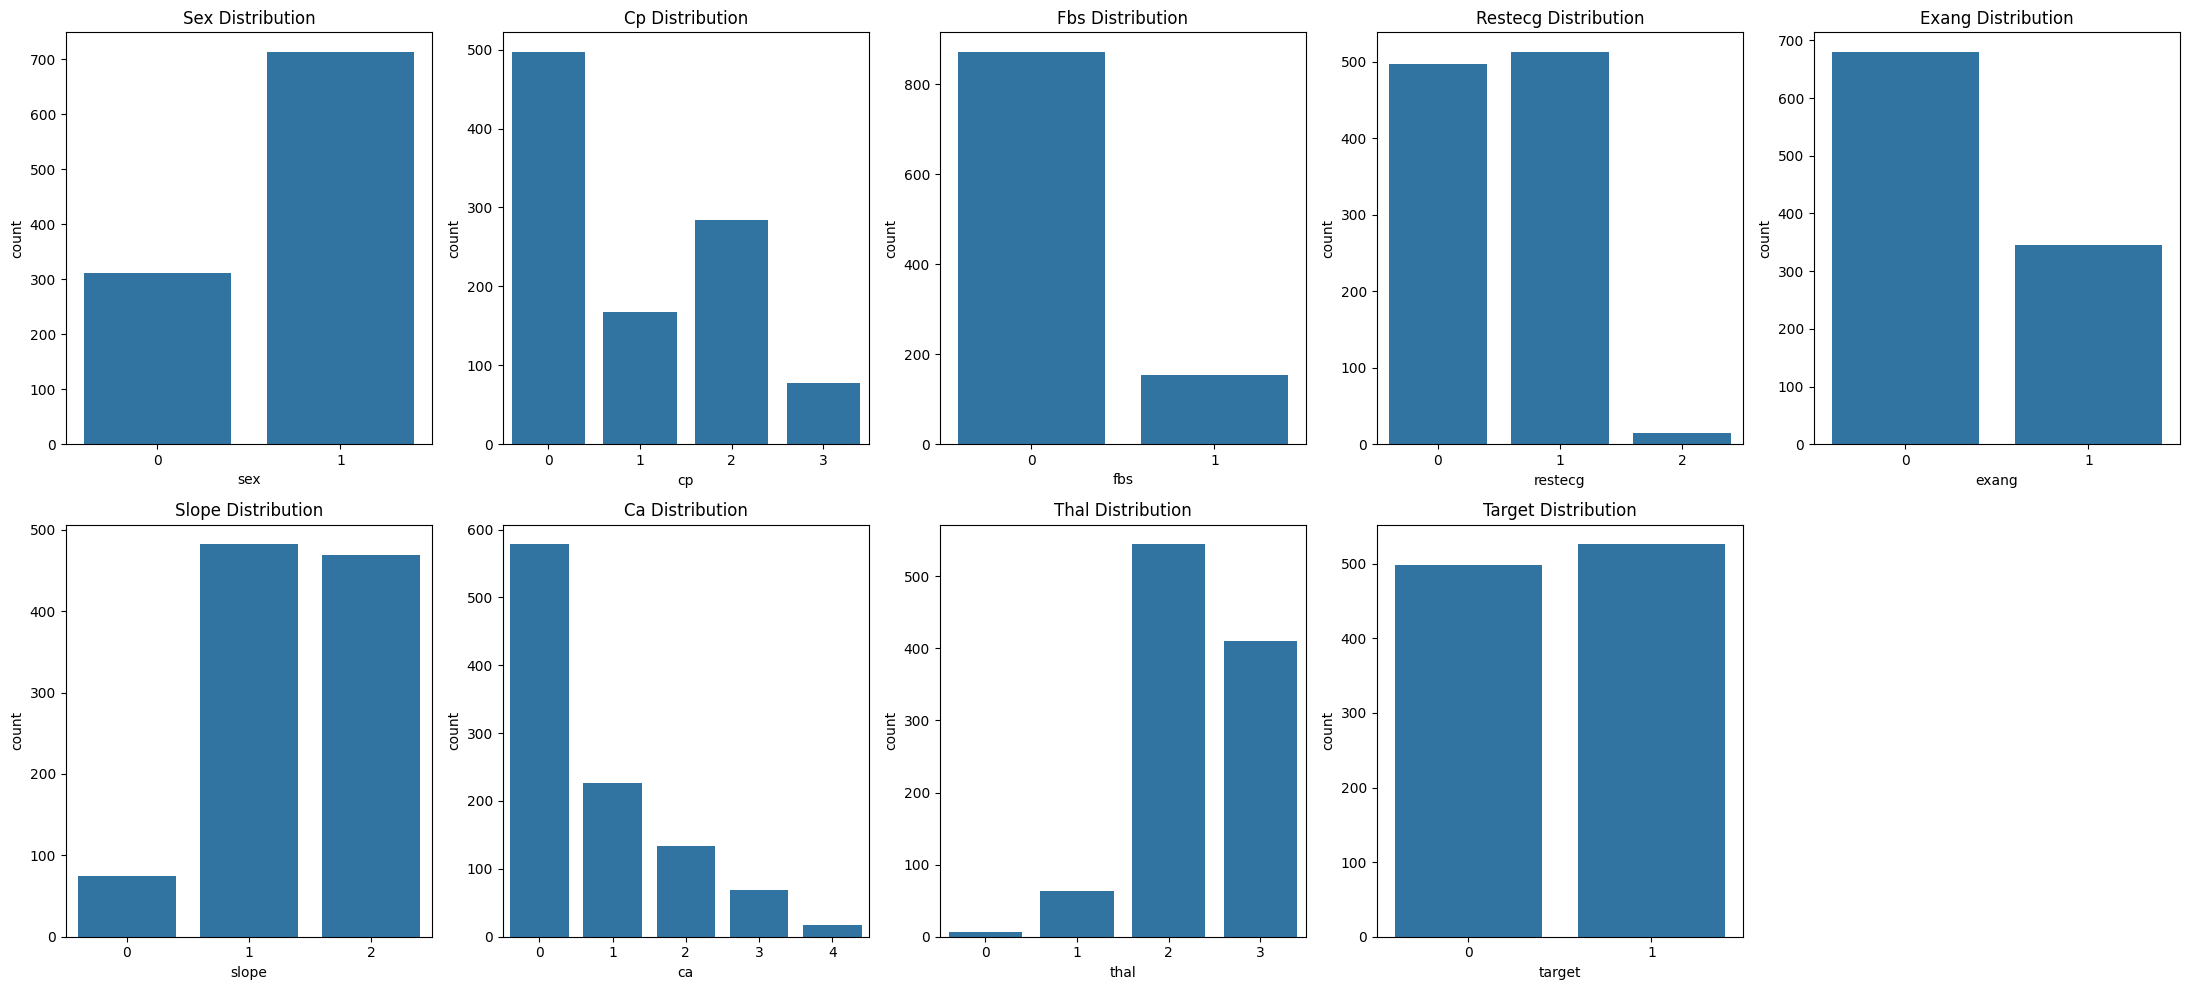

In [124]:
fig, axes = plt.subplots(2, 5, figsize=(22, 10))

# Countplot for all categorical features
for i, column in enumerate(cat.columns):
    if i < axes.size:
        row = i // 5
        col = i % 5
        sns.countplot(x=column, data=cat, ax=axes[row, col])
        axes[row, col].set_title(f'{column.capitalize()} Distribution')

fig.delaxes(axes[1, 4])

plt.tight_layout()
plt.show()

Terdapat ketidakseimbangan data pada beberapa fitur kategorikal, seperti jenis kelamin (sex), di mana mayoritas pasien adalah laki-laki. Ini perlu diperhatikan dalam proses pemodelan. Sedangkan, untuk fitur target (target) menunjukkan distribusi yang cukup seimbang.

## Correlation Analysis

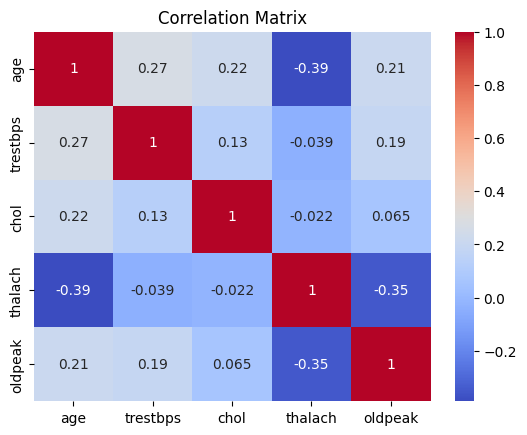

In [125]:
# Correlation matrix between numerical features
corr_matrix = num.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Korelasi antar fitur numerik secara umum tidak menunjukkan multikolinearitas yang tinggi, sehingga semua fitur dapat digunakan tanpa khawatir adanya redundansi.

## Outlier Detection

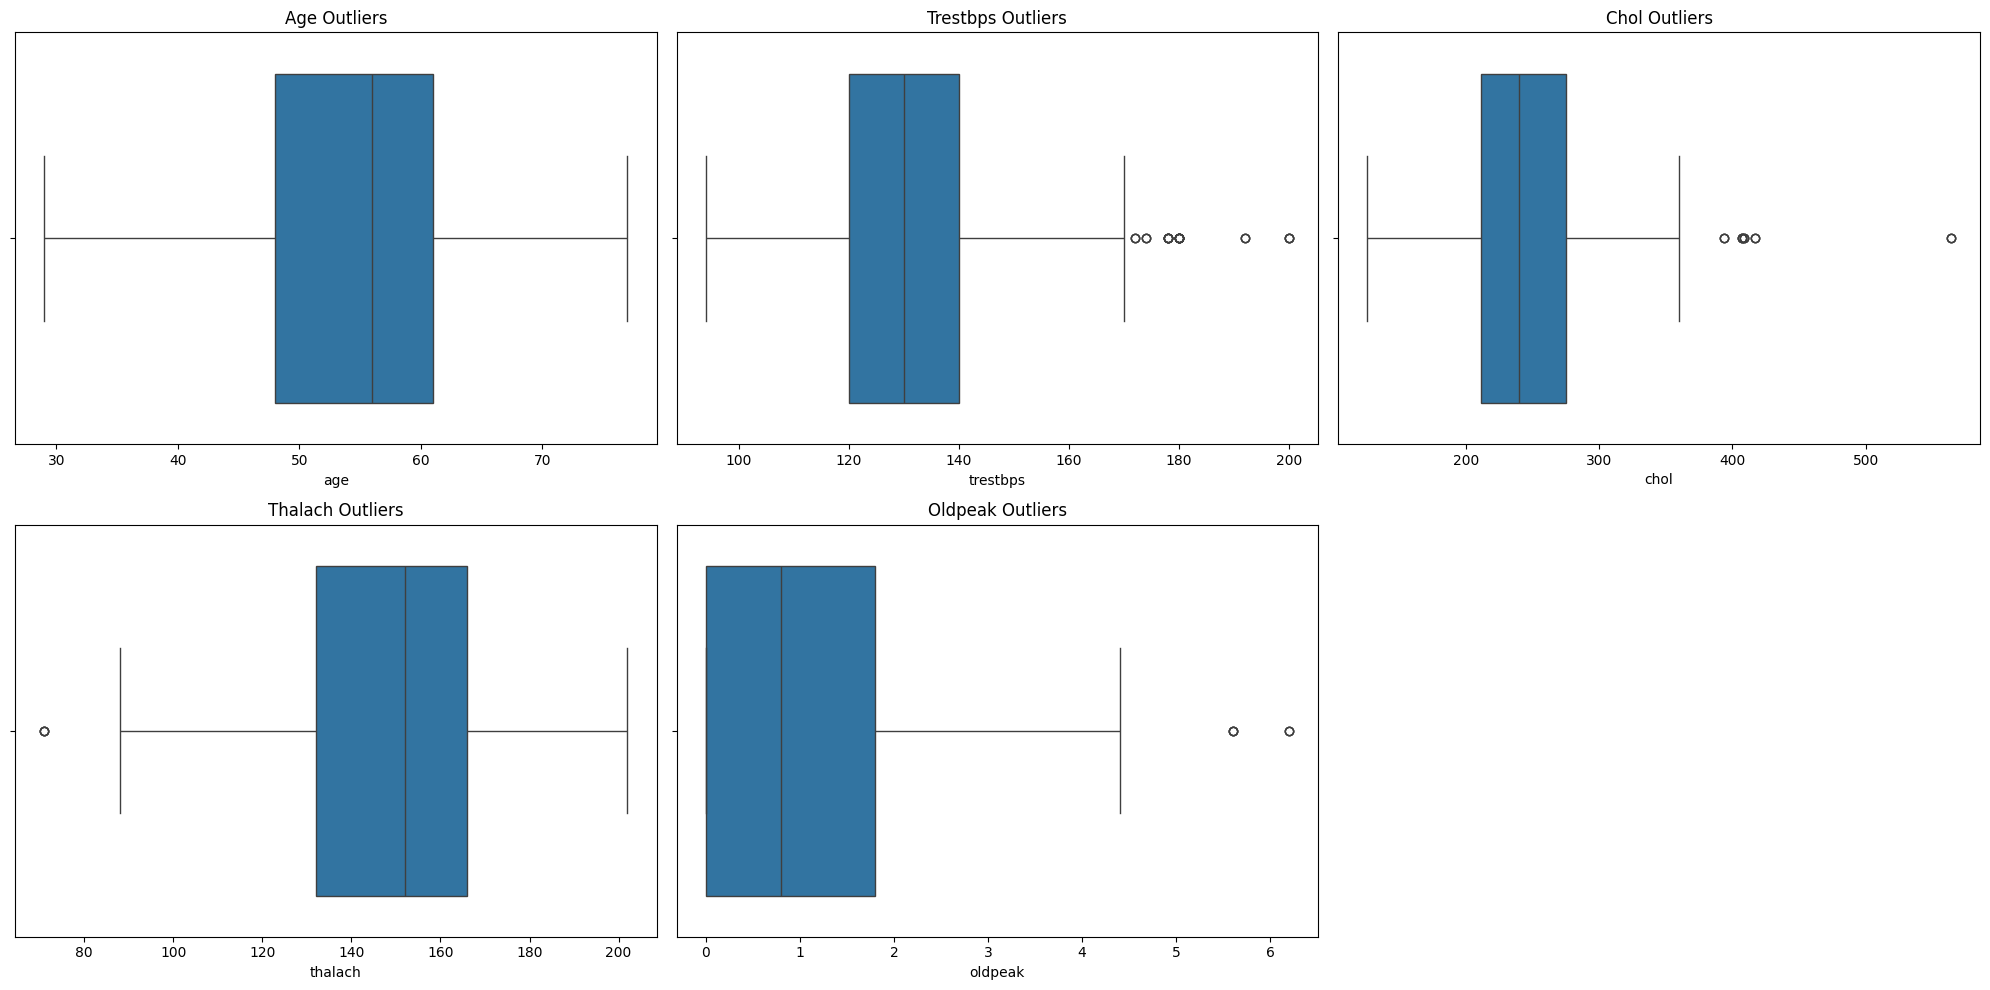

In [126]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Boxplot for all numerical features to check for outliers
for i, column in enumerate(num.columns):
    if i < axes.size:
        row = i // 3
        col = i % 3
        sns.boxplot(x=num[column], ax=axes[row, col])
        axes[row, col].set_title(f'{column.capitalize()} Outliers')

fig.delaxes(axes[1, 2])

plt.tight_layout()
plt.show()

Beberapa fitur numerik seperti trestbps dan chol menunjukkan outlier yang signifikan, yang perlu ditangani agar tidak mempengaruhi performa model.

# Data Preprocessing

## Data Cleaning

### Remove Duplicates

Terdapat duplikasi pada data yang dapat menyebabkan model memberikan bias yang tidak diinginkan, sehingga menghapusnya membantu memastikan bahwa setiap observasi dalam data adalah unik.

In [127]:
print(f"Before removing duplicates: {data.shape}")
data = data.drop_duplicates()
print(f"After removing duplicates: {data.shape}")

Before removing duplicates: (1025, 14)
After removing duplicates: (302, 14)


### Handling Outliers

Pada fitur trestbps dan chol, terlihat adanya outliers yang signifikan di bagian atas distribusi. Namun, nilai-nilai ini masih mungkin berada dalam rentang yang valid secara medis, meskipun jarang sehingga dilakukan capping.

In [128]:
data['trestbps'] = np.where(data['trestbps'] > 180, 180, data['trestbps'])
data['chol'] = np.where(data['chol'] > 400, 400, data['chol'])

Fitur oldpeak memiliki beberapa outliers di bagian atas distribusi, dan data ini juga tampak sangat skewed sehingga diterapkan metode log transformation untuk menekan outliers dan membuat distribusi lebih normal.

In [129]:
data['oldpeak'] = np.log1p(data['oldpeak']) 

Outliers di thalach dan age tampaknya tidak terlalu ekstrem dan masih berada dalam rentang yang mungkin secara biologis sehingga outliers tidak perlu dihapus.

## Data Transformation

### Standardization

Standardisasi memastikan bahwa setiap fitur berkontribusi secara proporsional. Fitur yang fitransformasikan adalah semua fitur numerik yang memiliki skala berbeda.

In [130]:
scaler = StandardScaler()
data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']] = scaler.fit_transform(data[['age', 'trestbps', 'chol', 'thalach', 'oldpeak']])

### Categorical Data Encoding

One-hot encoding mengubah fitur kategorikal menjadi variabel dummy (0 atau 1), yang bisa digunakan sebagai input dalam model machine learning. One-hot encoding dipilih karena aman untuk menghindari asumsi ordinalitas pada kategori yang seharusnya tidak ordinal (misalnya, tipe nyeri dada cp). Fitur yang ditransformasikan adalah semua fitur kategorikal seperti sex, cp, fbs, restecg, exang, slope, ca, dan thal.

In [131]:
data = pd.get_dummies(data, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'], drop_first=True)

In [132]:
data = data.astype({col: 'int' for col in data.select_dtypes(include='bool').columns})

In [133]:
data.dtypes

age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
target         int64
sex_1          int64
cp_1           int64
cp_2           int64
cp_3           int64
fbs_1          int64
restecg_1      int64
restecg_2      int64
exang_1        int64
slope_1        int64
slope_2        int64
ca_1           int64
ca_2           int64
ca_3           int64
ca_4           int64
thal_1         int64
thal_2         int64
thal_3         int64
dtype: object

# Modeling and Validation

## Data Splitting and Cross-Validation Setup

In [134]:
# Splitting the data into features and target
X = data.drop('target', axis=1)
y = data['target']
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [135]:
# Define k-fold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

Metrik Evaluasi yang akan digunakan adalah Accuracy. Accuracy adalah metrik dasar yang memberikan gambaran umum tentang seberapa baik model memprediksi secara keseluruhan dan sangat berguna jika distribusi kelas dalam dataset relatif seimbang (seperti dalam dataset ini).

## Model 1: K-Nearest Neighbors (KNN)

### Menggunakan Implementasi From Scratch

In [136]:
import knn
importlib.reload(knn)

from knn import KNN

knn = KNN(k=3, distance_metric="euclidean")

# Using holdout validation
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
ho_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ho_accuracy}")

# Using k-fold cross-validation
cv_accuracy = cross_val_score(knn, X, y, cv=kfold, scoring="accuracy").mean()
print(f"Cross-validation Accuracy: {cv_accuracy}")

Accuracy: 0.7049180327868853
Cross-validation Accuracy: 0.7946448087431695


### Menggunakan Implementasi dari Library

In [137]:
knn_lib = KNeighborsClassifier(n_neighbors=3, metric="euclidean")

# Using holdout validation
knn_lib.fit(X_train, y_train)
y_pred_lib = knn_lib.predict(X_test)
ho_accuracy_lib = accuracy_score(y_test, y_pred_lib)
print(f'Accuracy: {ho_accuracy_lib}')

# Using k-fold cross-validation
cv_accuracy_lib = cross_val_score(knn_lib, X, y, cv=kfold, scoring="accuracy").mean()
print(f'Cross-validation Accuracy: {cv_accuracy_lib}')

Accuracy: 0.7049180327868853
Cross-validation Accuracy: 0.7946448087431695


## Model 2: Logistic Regression

### Menggunakan Implementasi From Scratch

In [138]:
import logistic_regression
importlib.reload(logistic_regression)

from logistic_regression import LogisticRegression2

log = LogisticRegression2(learning_rate=0.13, num_iterations=1000, regularization='l2', lambda_=0.01, loss_function="cross_entropy")

# Using holdout validation
log.fit(X_train, y_train) # /log.fit_newton(X_train, y_train)
y_pred = log.predict(X_test)
ho_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ho_accuracy}")

# Using k-fold cross-validation
cv_accuracy = cross_val_score(log, X, y, cv=kfold, scoring="accuracy").mean()
print(f"Cross-validation Accuracy: {cv_accuracy}")

Accuracy: 0.7868852459016393
Cross-validation Accuracy: 0.8376502732240437


### Menggunakan Implementasi dari Library

In [139]:
log_lib = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, C=1/0.01)

# Using holdout validation
log_lib.fit(X_train, y_train)
y_pred_lib = log_lib.predict(X_test)
ho_accuracy_lib = accuracy_score(y_test, y_pred_lib)
print(f'Accuracy: {ho_accuracy_lib}')

# Using k-fold cross-validation
cv_accuracy_lib = cross_val_score(log_lib, X, y, cv=kfold, scoring="accuracy").mean()
print(f'Cross-validation Accuracy: {cv_accuracy_lib}')

Accuracy: 0.7868852459016393
Cross-validation Accuracy: 0.8343715846994536


## Model 3: Gaussian Naive Bayes

### Menggunakan Implementasi From Scratch

In [140]:
import gaussian_naive_bayes
importlib.reload(gaussian_naive_bayes)

from gaussian_naive_bayes import GaussianNaiveBayes

gnb = GaussianNaiveBayes()

# Using holdout validation
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
ho_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ho_accuracy}")

# Using k-fold cross-validation
cv_accuracy = cross_val_score(gnb, X, y, cv=kfold, scoring="accuracy").mean()
print(f"Cross-validation Accuracy: {cv_accuracy}")

Accuracy: 0.7868852459016393
Cross-validation Accuracy: 0.784863387978142


### Menggunakan Implementasi dari Library

In [141]:
gnb_lib = GaussianNB()

# Using holdout validation
gnb_lib.fit(X_train, y_train)
y_pred_lib = gnb_lib.predict(X_test)
ho_accuracy_lib = accuracy_score(y_test, y_pred_lib)
print(f'Accuracy: {ho_accuracy_lib}')

# Using k-fold cross-validation
cv_accuracy_lib = cross_val_score(gnb_lib, X, y, cv=kfold, scoring="accuracy").mean()
print(f'Cross-validation Accuracy: {cv_accuracy_lib}')


Accuracy: 0.7868852459016393
Cross-validation Accuracy: 0.784863387978142


## Model 4: CART (Classification and Regression Tree)

### Menggunakan Implementasi From Scratch

In [142]:
import cart
importlib.reload(cart)

from cart import DecisionTreeCART

cart = DecisionTreeCART(max_depth=5, min_samples_split=8)

# Using holdout validation
cart.fit(X_train, y_train)
y_pred = cart.predict(X_test)
ho_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {ho_accuracy}")

# Using k-fold cross-validation
cv_accuracy = cross_val_score(cart, X, y, cv=kfold, scoring="accuracy").mean()
print(f"Cross-validation Accuracy: {cv_accuracy}")

Accuracy: 0.7049180327868853
Cross-validation Accuracy: 0.7254098360655739


### Menggunakan Implementasi dari Library

In [143]:
cart_lib = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)

# Using holdout validation
cart_lib.fit(X_train, y_train)
y_pred_lib = cart_lib.predict(X_test)
ho_accuracy_lib = accuracy_score(y_test, y_pred_lib)
print(f'Accuracy: {ho_accuracy_lib}')

# Using k-fold cross-validation
cv_accuracy_lib = cross_val_score(cart_lib, X, y, cv=kfold, scoring="accuracy").mean()
print(f'Cross-validation Accuracy: {cv_accuracy_lib}')

Accuracy: 0.7049180327868853
Cross-validation Accuracy: 0.7251912568306011


## Model 5: SVM (Support Vector Machine)

### Menggunakan Implementasi From Scratch

In [144]:
# import svm
# importlib.reload(svm)

# from svm import SVM

# # Using holdout validation
# svm = SVM(kernel="linear", learning_rate=0.01, n_iters=1000)
# svm.fit(X_train, y_train)
# y_pred = svm.predict(X_test)
# ho_accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {ho_accuracy}")

# # Using k-fold cross-validation
# cv_accuracy = cross_val_score(svm, X, y, cv=kfold, scoring="accuracy").mean()
# print(f"Cross-validation Accuracy: {cv_accuracy}")

Accuracy: 0.39344262295081966
Cross-validation Accuracy: 0.4669398907103825


### Menggunakan Implementasi dari Library

In [145]:
svm_lib = SVC(kernel='linear', C=1/0.01, max_iter=1000)

# Using holdout validation
svm_lib.fit(X_train, y_train)
y_pred_lib = svm_lib.predict(X_test)
ho_accuracy_lib = accuracy_score(y_test, y_pred_lib)
print(f'Accuracy: {ho_accuracy_lib}')

# Using k-fold cross-validation
cv_accuracy_lib = cross_val_score(svm_lib, X, y, cv=kfold, scoring="accuracy").mean()
print(f'Cross-validation Accuracy: {cv_accuracy_lib}')

Accuracy: 0.4426229508196721
Cross-validation Accuracy: 0.6591256830601092


## Model 6: ANN (Artificial Neural Network)

### Menggunakan Implementasi From Scratch

### Menggunakan Implementasi dari Library